In [1]:
using ForneyLab, Random
using Plots
using DelimitedFiles, DataFrames
Random.seed!(0);

In [2]:
#Generate data
T = 400

vz, vy = 0.01, 0.1

z_data_0 = 0
z_data = [sin(pi/60) + sqrt(vz)*randn()]
x_data_0 = 0
x_data = [x_data_0 + sqrt(exp(z_data[1]))*randn()]
y_data = [x_data[1]+sqrt(vy)*randn()]
for t=2:T
    append!(z_data, sin(t*pi/60) + sqrt(vz)*randn())
    append!(x_data, x_data[end] + sqrt(exp(z_data[end]))*randn())
    append!(y_data, x_data[end]+sqrt(vy)*randn())
end

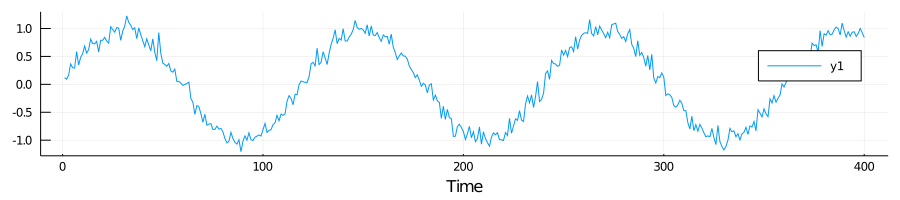

In [3]:
plot(z_data, xlabel="Time", size=(900,200))

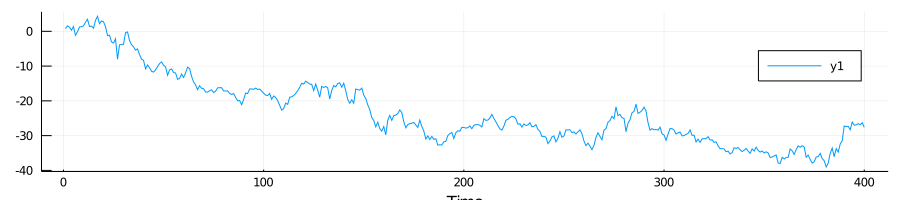

In [4]:
plot(y_data, xlabel="Time", size=(900,200))

In [5]:
g = FactorGraph()

@RV m_z_t_min 
@RV v_z_t_min 
@RV z_t_min ~ GaussianMeanVariance(m_z_t_min, v_z_t_min)
model_vz = 0.1
@RV z_t ~ GaussianMeanVariance(z_t_min, model_vz)

@RV m_x_t_min
@RV v_x_t_min
@RV x_t_min ~ GaussianMeanVariance(m_x_t_min, v_x_t_min)

f(z) = 1/exp(z)
@RV wx_t ~ Nonlinear{Sampling}(z_t,g=f)
@RV x_t ~ GaussianMeanPrecision(x_t_min, wx_t)
model_vy = 0.1
@RV y_t ~ GaussianMeanVariance(x_t, model_vy)

# Placeholders for prior
placeholder(m_z_t_min, :m_z_t_min)
placeholder(v_z_t_min, :v_z_t_min)

# Placeholders for prior
placeholder(m_x_t_min, :m_x_t_min)
placeholder(v_x_t_min, :v_x_t_min)

# Placeholder for data
placeholder(y_t, :y_t);

In [6]:
ForneyLab.draw()

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 2.40.1 (20161225.0304)
 -->
<!-- Title: G Pages: 1 -->
 
 
 G 
 
<!-- 3009897295041734875 -->
 
 3009897295041734875 
 
 𝒩 
 gaussianmeanvariance_2 
 
<!-- 7448321721350294046 -->
 
 7448321721350294046 
 
 𝒩 
 gaussianmeanvariance_1 
 
<!-- 3009897295041734875--7448321721350294046 -->
 
 3009897295041734875--7448321721350294046 
 
 z_t_min 
 1 out 
 2 m 
 
<!-- 14747200570157861489 -->
 
 14747200570157861489 
 
 clamp_1 
 
<!-- 3009897295041734875--14747200570157861489 -->
 
 3009897295041734875--14747200570157861489 
 
 clamp_1 
 1 out 
 3 v 
 
<!-- 15676861340727299160 -->
 
 15676861340727299160 
 
 placeholder_v_x_t_min 
 
<!-- 9378427993667697705 -->
 
 9378427993667697705 
 
 𝒩 
 gaussianmeanvariance_3 
 
<!-- 15676861340727299160--9378427993667697705 -->
 
 15676861340727299160--9378427993667697705 
 
 v_x_t_min 
 3 v 
 1 out 
 
<!-- 6933738905338535187 -->
 
 6933738905338535187 
 
 g{Sampling} 
 nonlinear_1 
 
<!-- 6933738905338535187--3009897295041734875 -->
 
 6933738905338535187--3009897295041734875 
 
 z_t 
 1 out 
 2 in1 
 
<!-- 4122071333136044513 -->
 
 4122071333136044513 
 
 placeholder_v_z_t_min 
 
<!-- 4122071333136044513--7448321721350294046 -->
 
 4122071333136044513--7448321721350294046 
 
 v_z_t_min 
 3 v 
 1 out 
 
<!-- 1500922555976898844 -->
 
 1500922555976898844 
 
 𝒩 
 gaussianmeanvariance_4 
 
<!-- 5385679245828344784 -->
 
 5385679245828344784 
 
 clamp_2 
 
<!-- 1500922555976898844--5385679245828344784 -->
 
 1500922555976898844--5385679245828344784 
 
 clamp_2 
 1 out 
 3 v 
 
<!-- 15578933017089679267 -->
 
 15578933017089679267 
 
 𝒩 
 gaussianmeanprecision_1 
 
<!-- 1500922555976898844--15578933017089679267 -->
 
 1500922555976898844--15578933017089679267 
 
 x_t 
 1 out 
 2 m 
 
<!-- 16392097142442090436 -->
 
 16392097142442090436 
 
 placeholder_m_x_t_min 
 
<!-- 16392097142442090436--9378427993667697705 -->
 
 16392097142442090436--9378427993667697705 
 
 m_x_t_min 
 2 m 
 1 out 
 
<!-- 15578933017089679267--6933738905338535187 -->
 
 15578933017089679267--6933738905338535187 
 
 wx_t 
 1 out 
 3 w 
 
<!-- 15578933017089679267--9378427993667697705 -->
 
 15578933017089679267--9378427993667697705 
 
 x_t_min 
 1 out 
 2 m 
 
<!-- 2670238555231053845 -->
 
 2670238555231053845 
 
 placeholder_y_t 
 
<!-- 2670238555231053845--1500922555976898844 -->
 
 2670238555231053845--1500922555976898844 
 
 y_t 
 1 out 
 1 out 
 
<!-- 3834869522060343704 -->
 
 3834869522060343704 
 
 placeholder_m_z_t_min 
 
<!-- 3834869522060343704--7448321721350294046 -->
 
 3834869522060343704--7448321721350294046 
 
 m_z_t_min 
 2 m 
 1 out

In [7]:
PosteriorFactorization()

q_x = PosteriorFactor([x_t, x_t_min], id=:XMF)
q_z = PosteriorFactor(z_t, id=:ZMF)
q_z_t_min = PosteriorFactor(z_t_min, id=:ZMinMF)
etime1 = @elapsed algo_mf = messagePassingAlgorithm(id=:MF, free_energy=true);

In [8]:
etime2 = @elapsed source_code = algorithmSourceCode(algo_mf,free_energy=true)
eval(Meta.parse(source_code));

In [9]:
println(source_code)

begin

function stepMFZMinMF!(data::Dict, marginals::Dict=Dict(), messages::Vector{Message}=Array{Message}(undef, 2))

messages[1] = ruleVBGaussianMeanVarianceOut(nothing, ProbabilityDistribution(Univariate, PointMass, m=data[:m_z_t_min]), ProbabilityDistribution(Univariate, PointMass, m=data[:v_z_t_min]))
messages[2] = ruleVBGaussianMeanVarianceM(marginals[:z_t], nothing, ProbabilityDistribution(Univariate, PointMass, m=0.1))

marginals[:z_t_min] = messages[1].dist * messages[2].dist

return marginals

end

function stepMFZMF!(data::Dict, marginals::Dict=Dict(), messages::Vector{Message}=Array{Message}(undef, 4))

messages[1] = ruleVBGaussianMeanVarianceOut(nothing, marginals[:z_t_min], ProbabilityDistribution(Univariate, PointMass, m=0.1))
messages[2] = ruleSVBGaussianMeanPrecisionW(marginals[:x_t_x_t_min], nothing)
messages[3] = ruleSPNonlinearSIn1MN(f, messages[2], nothing)
messages[4] = ruleSPNonlinearSOutNM(f, nothing, messages[1])

marginals[:wx_t] = messages[4].dist * messages[

In [10]:
total_time = etime1 + etime2

2.739276517

In [11]:
# Define values for prior statistics
m_z_0, v_z_0 = 0.0, 1.0
m_x_0, v_x_0 = 0.0, 1.0

m_z = Vector{Float64}(undef, T)
v_z = Vector{Float64}(undef, T)
m_x = Vector{Float64}(undef, T)
v_x = Vector{Float64}(undef, T)

m_z_t_min, v_z_t_min = m_z_0, v_z_0
m_x_t_min, v_x_t_min = m_x_0, v_x_0
mwx_t_min, vwx_t_min = f(m_z_0), v_z_0

n_its = 10
marginals_mf = Dict()
F_mf = zeros(n_its,T)
for t = 1:T
    # Prepare data and prior statistics
    data = Dict(:y_t       => y_data[t],
                :m_z_t_min => m_z_t_min,
                :v_z_t_min => v_z_t_min,
                :m_x_t_min => m_x_t_min,
                :v_x_t_min => v_x_t_min)
    
    # Initial recognition distributions
    marginals_mf[:z_t] = ProbabilityDistribution(Univariate, GaussianMeanVariance, m=m_z_t_min, v=v_z_t_min)
    marginals_mf[:x_t_min] = ProbabilityDistribution(Univariate, GaussianMeanVariance, m=m_x_t_min, v=v_x_t_min)
    marginals_mf[:z_t_min] = ProbabilityDistribution(Univariate, GaussianMeanVariance, m=m_z_t_min, v=v_z_t_min)
    marginals_mf[:wx_t] = vague(SampleList)
    
    # Execute algorithm
    for i = 1:n_its
        etime1 = @elapsed stepMFZMinMF!(data, marginals_mf)
        etime2 = @elapsed stepMFXMF!(data, marginals_mf)
        etime3 = @elapsed stepMFZMF!(data, marginals_mf)
        F_mf[i,t] = freeEnergyMF(data, marginals_mf)
        total_time = total_time + etime1 + etime2 + etime3 
    end

    m_z_t_min = mean(marginals_mf[:z_t])
    v_z_t_min = var(marginals_mf[:z_t])
    m_x_t_min = mean(marginals_mf[:x_t])
    v_x_t_min = var(marginals_mf[:x_t])
    mwx_t_min = mean(marginals_mf[:wx_t])
    vwx_t_min = var(marginals_mf[:wx_t])
    
    # Store to buffer 
    m_x[t] = m_x_t_min
    v_x[t] = v_x_t_min
    m_z[t] = m_z_t_min
    v_z[t] = v_z_t_min
end

In [12]:
total_time

6.868371725999981

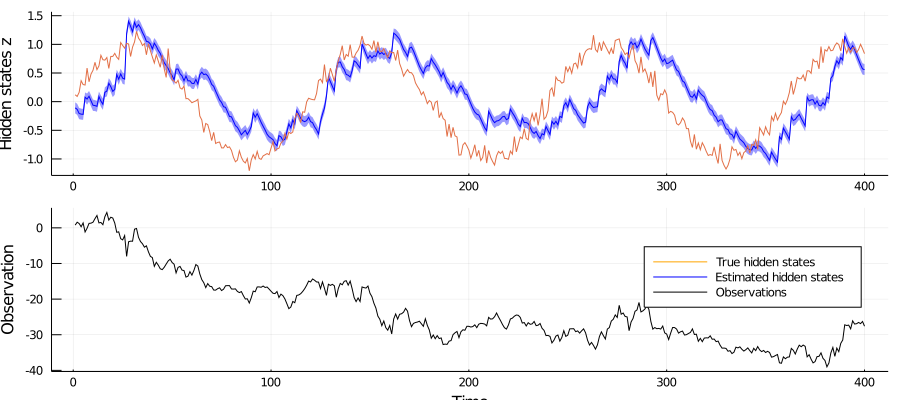

In [13]:
gr()
l = @layout [a ; b]

p1 = plot(m_z, ribbon=v_z, fillalpha=0.4, lw=1, color=:blue, label="Estimated hidden states",legend=false, yaxis="Hidden states z")
plot!(z_data,lw=1,label="True hidden states")

p2 = plot([fill(NaN, T) fill(NaN, T) y_data], lw=1, color=[:orange :blue :black], label=["True hidden states" "Estimated hidden states" "Observations"], legend=:topright, xaxis="Time", yaxis="Observation", link=:x)

p = plot(p1, p2, layout = l, size = (900, 400))

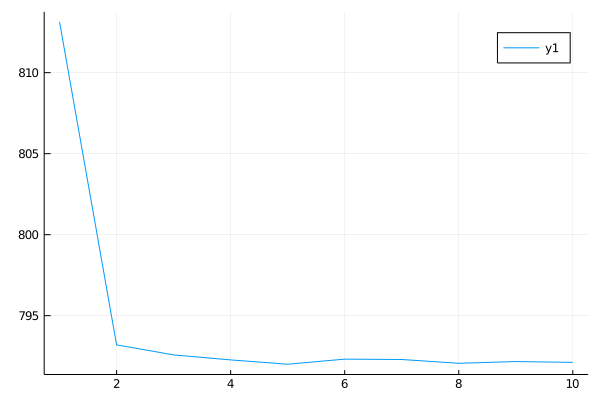

In [14]:
plot(sum(F_mf,dims=2))

In [15]:
writedlm("FLmeanestimates.txt", m_z)
writedlm("FLvarestimates.txt", v_z)